In [1]:
import numpy as np
import os
import PIL
from PIL import Image
import pickle
from tqdm import tqdm
import tensorflow as tf
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
from xgboost import XGBClassifier
import gc

In [2]:
train_images_path = '/Users/denish/Desktop/Denish /Imp Projects/Fashion-material-image-classification/Data/train'

In [3]:
test_image_path = '/Users/denish/Desktop/Denish /Imp Projects/Fashion-material-image-classification/Data/test'

In [4]:
validation_image_path = '/Users/denish/Desktop/Denish /Imp Projects/Fashion-material-image-classification/Data/validation'

In [5]:
def load_image(path):
    '''
    Fetch image from disk
    '''
    from tensorflow.keras.preprocessing import image
    size = (128, 128)
    img = image.load_img(path, target_size=size)
    img = image.img_to_array(img)
    return img

In [7]:
csv = '/Users/denish/Desktop/Denish /Imp Projects/Fashion-material-image-classification/train_labels.csv'

In [8]:
def load_data(folder_path,csv_path):
    df = pd.read_csv(csv_path)
    x = df.iloc[:,1:].values
    y = df.iloc[:,0:1].values
    img = list()
    ylist = list()
    i=0
    while i<len(x):
        try:
            img.append(load_image(os.path.join(folder_path,f'{x[i][0]}.jpg')))
            ylist.append(eval(y[i][0]))
        except:
            pass
#             print(x[i])
        i+=1
    return img,ylist
        

In [9]:

gc.collect()

267

In [10]:
# from keras.utils.np_utils import to_categorical
# to_categorical(y_train)

In [11]:
def make_cat_dic(l1,l2):
    dic = {}
    i=0
    for e in l1:
        for f in e:
            if f not in list(dic.keys()):
                dic[f] = i
                i+=1
    for e in l2:
        for f in e:
            if f not in list(dic.keys()):
                dic[f] = i
                i+=1
    return dic

In [12]:
def convert_categorical(y, dic):
    i=0
    for yt in tqdm(y):
        temp = np.zeros(len(list(dic.keys())))
        for e in yt:
            temp[dic[e]] = 1
        y[i] = temp
        i+=1
        
    return y, dic

In [13]:
# val_images_path = '/Users/divy/Downloads/Data/validation'

In [14]:
val_csv = '/Users/denish/Desktop/Denish /Imp Projects/Fashion-material-image-classification/validation_labels.csv'

In [15]:
x_train,y_train = load_data(train_images_path,csv)

In [16]:
x_val,y_val = load_data(validation_image_path,val_csv)

In [17]:
dic = make_cat_dic(y_train, y_val)

In [18]:
y_train_cat, dic = convert_categorical(y_train, dic)

100%|██████████| 14720/14720 [00:00<00:00, 152965.29it/s]


In [19]:
y_val_cat = convert_categorical(y_val, dic)

100%|██████████| 3000/3000 [00:00<00:00, 108256.87it/s]


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten
model = keras.models.Sequential()

model.add(Conv2D(64, kernel_size=5, strides=2, activation='relu', input_shape=(x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2])))
model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu'))       
model.add(Conv2D(16, kernel_size=3, strides=1, activation='relu'))   
model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu'))   
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))   
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(len(dic), activation='sigmoid'))   # Final Layer using Softmax

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(np.asarray(x_train), np.asarray(y_train_cat), 10, 3)

Epoch 1/3
1472/1472 [==============================] - 436s 295ms/step - loss: 0.1082 - accuracy: 0.7021
Epoch 2/3
1472/1472 [==============================] - 371s 252ms/step - loss: 0.0782 - accuracy: 0.7126
Epoch 3/3
1472/1472 [==============================] - 373s 253ms/step - loss: 0.0653 - accuracy: 0.6946


In [22]:
model.predict(np.asarray(x_val))

array([[5.9444338e-02, 9.3135571e-01, 5.7078660e-02, ..., 6.4096284e-06,
        7.7640383e-09, 5.4933835e-08],
       [3.0837655e-03, 6.9009334e-01, 1.2742996e-02, ..., 2.1396509e-08,
        2.4513903e-07, 5.8984352e-07],
       [3.1822383e-02, 8.3117115e-01, 1.1612684e-02, ..., 1.0629625e-06,
        2.2263379e-07, 3.6485590e-06],
       ...,
       [5.8395207e-02, 9.1856521e-01, 2.1556348e-02, ..., 2.2675711e-06,
        1.1510832e-07, 7.0115959e-07],
       [3.6936194e-02, 4.0352106e-02, 2.3494989e-02, ..., 1.9285004e-10,
        6.7658242e-08, 4.9461863e-07],
       [7.5612664e-03, 9.8622620e-01, 3.2601386e-02, ..., 8.4066880e-07,
        2.9624962e-07, 4.3729941e-07]], dtype=float32)

In [30]:
# !pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="my neural newtork")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.2/419.2 kB 6.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


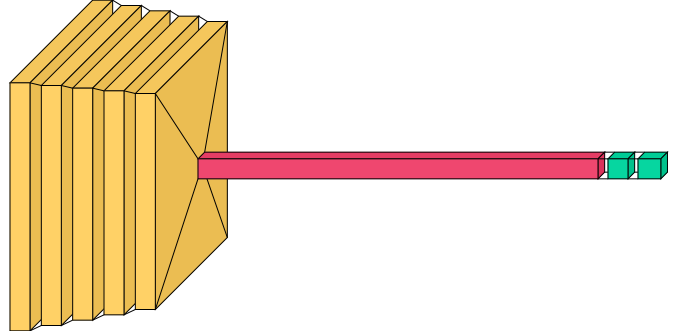

In [35]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)